In [25]:
#inport panda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#read the csv file
df = pd.read_csv('datos-17001.csv',delimiter=';')
print(df.head())

#normalize the data
def normalize(x):
    mean = x.mean()
    std = x.std()
    return (x - mean) / std, mean, std

def denormalize(x, map, key):
    return x * map[key][1] + map[key][0]

#create a Map key = name of the column, value = [mean, std]
mu_sigma_Map = {'RefSt' : [0,0], 'Sensor_O3' : [0,0], 'Temp' : [0,0], 'RelHum' : [0,0]}
#normalize the data
df['RefSt'], mu_sigma_Map['RefSt'][0],mu_sigma_Map['RefSt'][1]= normalize(df['RefSt'])
df['Sensor_O3'], mu_sigma_Map['Sensor_O3'][0],mu_sigma_Map['Sensor_O3'][1]= normalize(df['Sensor_O3'])
df['Temp'], mu_sigma_Map['Temp'][0],mu_sigma_Map['Temp'][1]= normalize(df['Temp'])
df['RelHum'], mu_sigma_Map['RelHum'][0],mu_sigma_Map['RelHum'][1]= normalize(df['RelHum'])

print (df.head())
print(mu_sigma_Map)

print(denormalize(df['RefSt'], mu_sigma_Map, 'RefSt').head())

              date  RefSt  Sensor_O3   Temp  RelHum
0  21/06/2017 7:00   15.0    36.3637  21.77   53.97
1  21/06/2017 7:30   15.0    34.8593  25.50   42.43
2  21/06/2017 8:00   19.0    37.3510  27.97   34.93
3  21/06/2017 8:30   26.0    43.6993  29.41   32.07
4  21/06/2017 9:00   34.0    53.9600  30.20   30.83
              date     RefSt  Sensor_O3      Temp    RelHum
0  21/06/2017 7:00 -1.179424  -1.153496 -0.496067  0.803293
1  21/06/2017 7:30 -1.179424  -1.162239  0.082811  0.027649
2  21/06/2017 8:00 -1.084073  -1.147758  0.466142 -0.476452
3  21/06/2017 8:30 -0.917208  -1.110864  0.689623 -0.668683
4  21/06/2017 9:00 -0.726506  -1.051231  0.812228 -0.752028
{'RefSt': [64.477, 41.950128537160445], 'Sensor_O3': [234.8399927, 172.06496618340148], 'Temp': [24.96641, 6.443502287858189], 'RelHum': [42.01864, 14.87796457787086]}
0    15.0
1    15.0
2    19.0
3    26.0
4    34.0
Name: RefSt, dtype: float64


In [26]:
#define X and Y sets
X = df[['Sensor_O3','Temp','RelHum']]
Y = df['RefSt']

#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

print(X_train,Y_train)

     Sensor_O3      Temp    RelHum
731   0.464666  2.229159 -1.139177
716  -1.189741 -1.060977  0.220552
640   2.598664  1.329027 -0.942242
804  -1.148061 -0.615567 -0.538961
737   0.723953  1.013981 -0.868307
..         ...       ...       ...
767  -1.115385  0.636857 -0.792356
72   -0.484598  0.005213  0.659456
908  -1.192028 -0.910438  1.660937
235  -1.169295 -0.615567  2.040021
37   -1.206296 -0.946133  2.443302

[700 rows x 3 columns] 731    0.775278
716   -1.393965
640    2.491601
804   -0.964884
737    1.180521
         ...   
767   -0.726506
72     0.179332
908   -1.417803
235   -1.227100
37    -1.417803
Name: RefSt, Length: 700, dtype: float64


In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, Y_train)
print(lm.intercept_,lm.coef_)

-0.0027490686128557144 [ 0.6441401   0.37148296 -0.02304412]


C:\Users\usalv\AppData\Local\Temp\ipykernel_5336\2768568558.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-1.5,3],[-1.5,3], '--k', color='red')


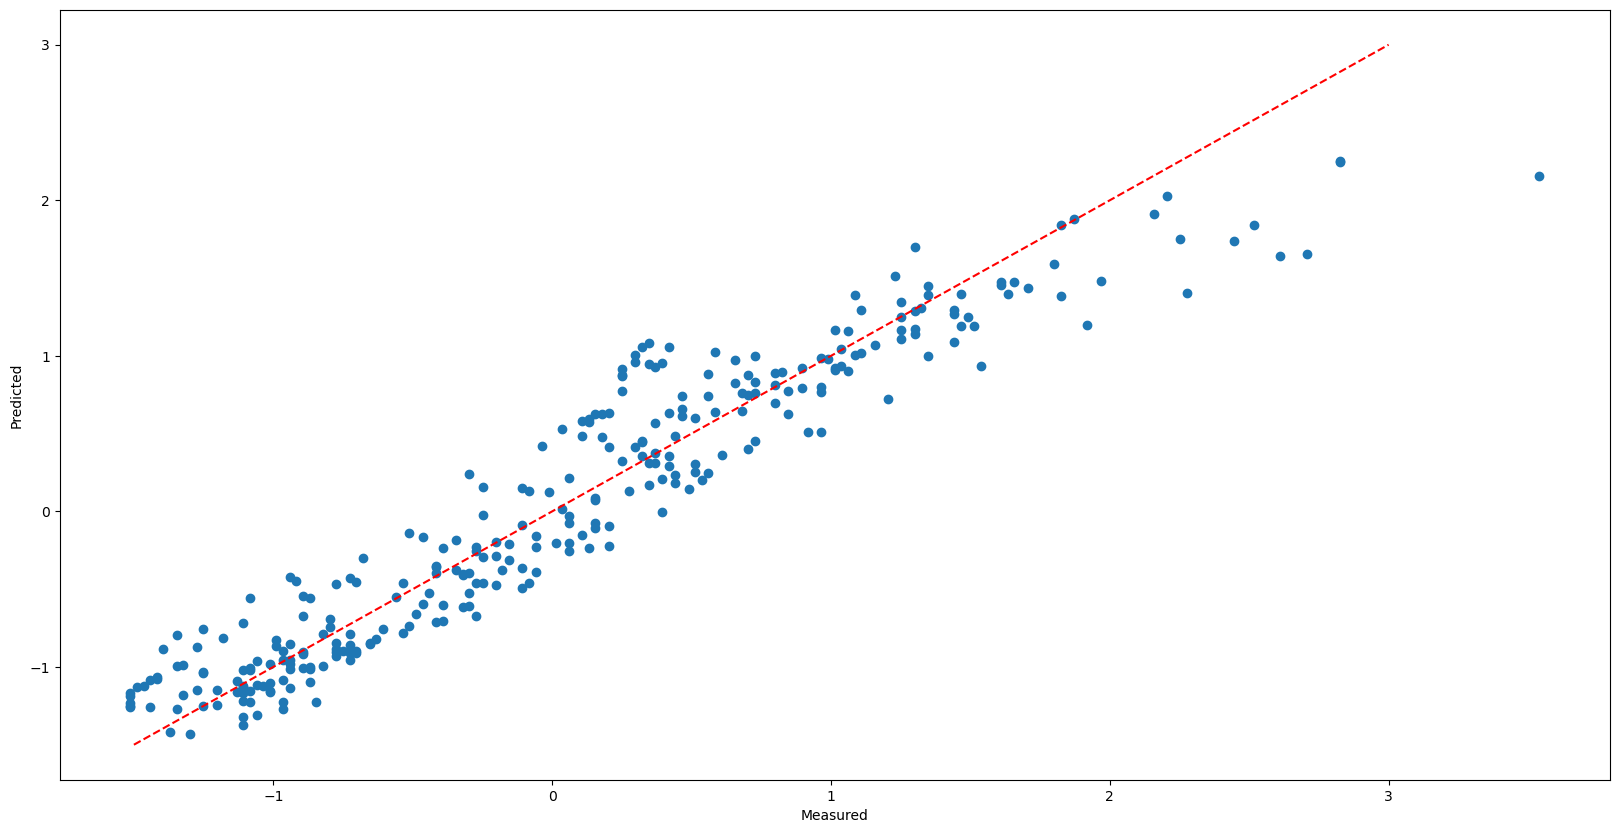

In [28]:
plt.scatter(Y_test,lm.predict(X_test))
#plot line of 45 degrees
plt.plot([-1.5,3],[-1.5,3], '--k', color='red')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [29]:
#r2 score
from sklearn.metrics import r2_score
print(r2_score(Y_test,lm.predict(X_test)))


0.9090705167941918


In [30]:
RMSE = np.sqrt(np.sum((denormalize(Y_test,mu_sigma_Map,'RefSt')-denormalize(lm.predict(X_test),mu_sigma_Map,'RefSt'))**2)/len(Y_test))
print(RMSE)

12.75765069841883


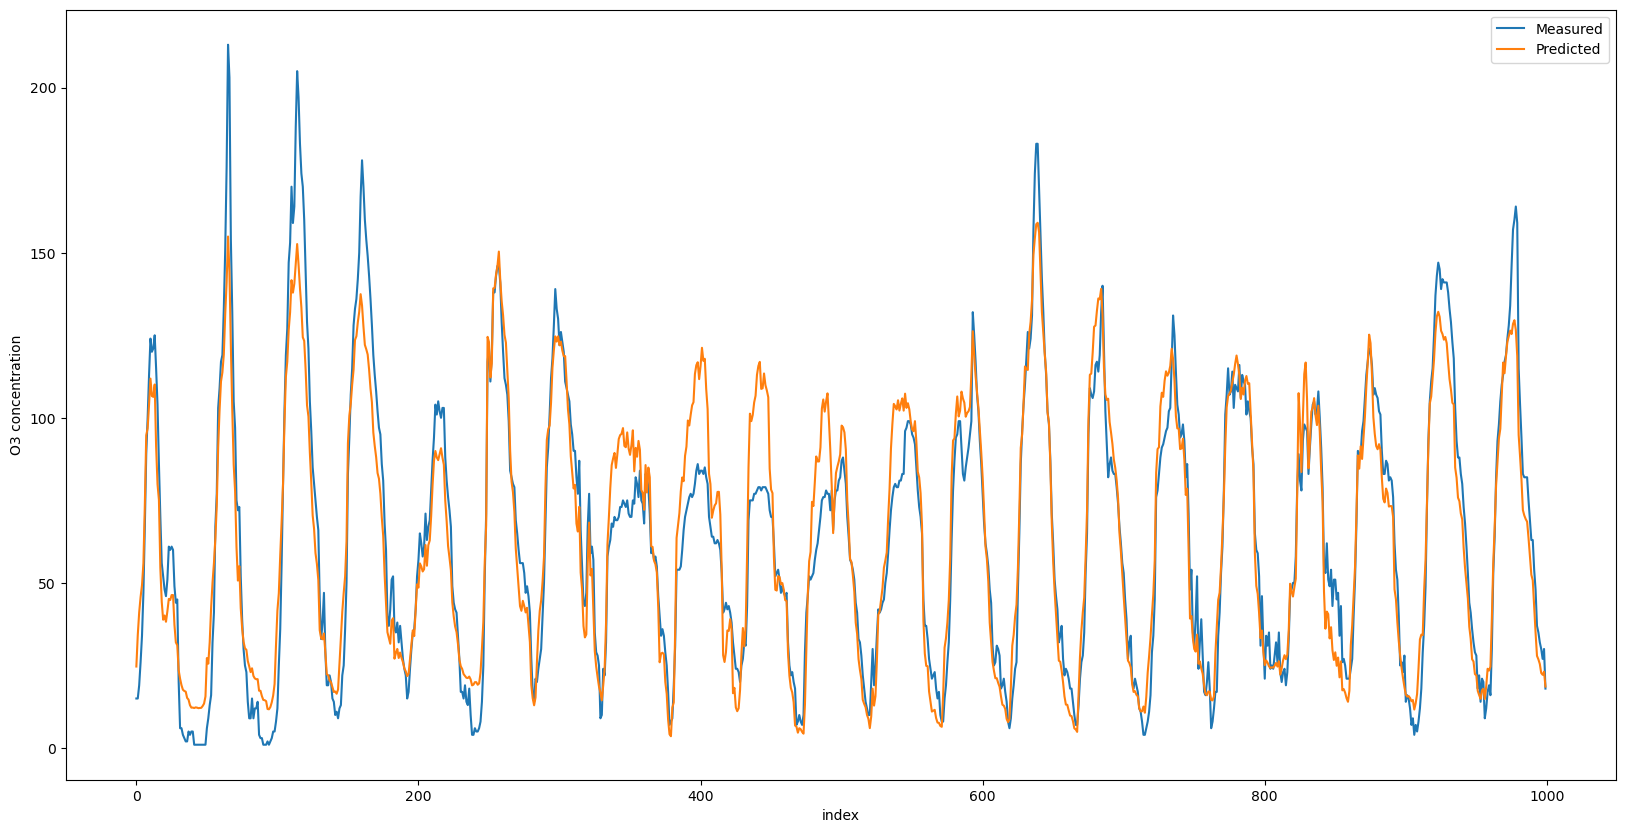

In [31]:
plt.plot(denormalize(df['RefSt'], mu_sigma_Map, 'RefSt'))
#plot predition on all data, set the index to the date
plt.plot(denormalize(lm.predict(df[['Sensor_O3','Temp','RelHum']]), mu_sigma_Map, 'RefSt'))
plt.legend(['Measured','Predicted'])
plt.xlabel('index')
plt.ylabel('O3 concentration')
#set dimensions of the plot
plt.rcParams["figure.figsize"] = (20,10)
plt.show()